In [1]:
from __future__ import print_function, division

%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import numpy as np
import pandas as pd

import random

import thinkstats2
import thinkplot

In [5]:
#"Price of Weed" data
transactions = pd.read_csv('mj-clean.csv', parse_dates=[5])
transactions.head()

,city,state,price,amount,quality,date,ppg,state.name,lat,lon
0,Annandale,VA,100,7.075,high,2010-09-02,14.13,Virginia,38.830345,-77.213870
1,Auburn,AL,60,28.300,high,2010-09-02,2.12,Alabama,32.578185,-85.472820
2,Austin,TX,60,28.300,medium,2010-09-02,2.12,Texas,30.326374,-97.771258
3,Belleville,IL,400,28.300,high,2010-09-02,14.13,Illinois,38.532311,-89.983521
4,Boone,NC,55,3.540,high,2010-09-02,15.54,North Carolina,36.217052,-81.687983


In [6]:
#Computes daily averages
def GroupByDay(transactions, func=np.mean):
    """Groups transactions by day and compute the daily mean ppg.

    transactions: DataFrame of transactions

    returns: DataFrame of daily prices
    """
    grouped = transactions[['date', 'ppg']].groupby('date')
    daily = grouped.aggregate(func)

    daily['date'] = daily.index
    start = daily.date[0]
    one_year = np.timedelta64(1, 'Y')
    daily['years'] = (daily.date - start) / one_year

    return daily

In [7]:
#Maps from a quality name to a DataFrame of daily averages
def GroupByQualityAndDay(transactions):
    """Divides transactions by quality and computes mean daily price.

    transaction: DataFrame of transactions
    
    returns: map from quality to time series of ppg
    """
    groups = transactions.groupby('quality')
    dailies = {}
    for name, group in groups:
        dailies[name] = GroupByDay(group)        

    return dailies

dailies = GroupByQualityAndDay(transactions)

In [8]:
import statsmodels.formula.api as smf
from IPython.display import display

def RunLinearModel(daily):
    model = smf.ols('ppg ~ years', data=daily)
    results = model.fit()
    return model, results

#Run a linear model with price as a function of time

for name, daily in dailies.items():
    model, results = RunLinearModel(daily)
    print(name)
    display(results.summary())

high


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     989.7
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          3.69e-160
Time:                        19:57:28   Log-Likelihood:                -1510.1
No. Observations:                1241   AIC:                             3024.
Df Residuals:                    1239   BIC:                             3035.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.4496      0.045    296.080      0.000      13.361      13.539
years         -0.7082      0.023    -31.460      0.000      -0.752      -0.664
==============================================================================
Omnibus:                       56.254   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.992
Skew:                           0.252   Prob(JB):                     9.76e-29
Kurtosis:                       4.497   Cond. No.                         4.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

low


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     35.90
Date:                Wed, 04 Aug 2021   Prob (F-statistic):           2.76e-09
Time:                        19:57:28   Log-Likelihood:                -3091.3
No. Observations:                1179   AIC:                             6187.
Df Residuals:                    1177   BIC:                             6197.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3616      0.194     27.671      0.000       4.981       5.742
years          0.5683      0.095      5.991      0.000       0.382       0.754
==============================================================================
Omnibus:                      649.338   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6347.614
Skew:                           2.373   Prob(JB):                         0.00
Kurtosis:                      13.329   Cond. No.                         4.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

medium


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     64.92
Date:                Wed, 04 Aug 2021   Prob (F-statistic):           1.82e-15
Time:                        19:57:28   Log-Likelihood:                -2053.9
No. Observations:                1238   AIC:                             4112.
Df Residuals:                    1236   BIC:                             4122.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8791      0.071    125.043      0.000       8.740       9.018
years          0.2832      0.035      8.057      0.000       0.214       0.352
==============================================================================
Omnibus:                      133.025   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              630.863
Skew:                           0.385   Prob(JB):                    1.02e-137
Kurtosis:                       6.411   Cond. No.                         4.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Exercise:**   The linear model I used in this chapter has the obvious drawback that it is linear, and there is no reason to expect prices to change linearly over time. We can add flexibility to the model by adding a quadratic term, as we did in Section 11.3.

Use a quadratic model to fit the time series of daily prices, and use the model to generate predictions. You will have to write a version of `RunLinearModel` that runs that quadratic model, but after that you should be able to reuse code from the chapter to generate predictions.

In [20]:
#Formula: ax^2+bx+c=0
#Need both linear and quadratic terms for the years variable
def RunQuadraticModel(daily):
    model = smf.ols('ppg ~ years + years**2', data=daily)
    results = model.fit()
    return model, results

#Run a quadratic with price as a function of time and time^2
for name, daily in dailies.items():
    model2, results = RunQuadraticModel(daily)
    print(name)
    display(results.summary())

high


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     989.7
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          3.69e-160
Time:                        20:07:59   Log-Likelihood:                -1510.1
No. Observations:                1241   AIC:                             3024.
Df Residuals:                    1239   BIC:                             3035.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.4496      0.045    296.080      0.000      13.361      13.539
years         -0.7082      0.023    -31.460      0.000      -0.752      -0.664
==============================================================================
Omnibus:                       56.254   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.992
Skew:                           0.252   Prob(JB):                     9.76e-29
Kurtosis:                       4.497   Cond. No.                         4.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

low


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     35.90
Date:                Wed, 04 Aug 2021   Prob (F-statistic):           2.76e-09
Time:                        20:07:59   Log-Likelihood:                -3091.3
No. Observations:                1179   AIC:                             6187.
Df Residuals:                    1177   BIC:                             6197.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3616      0.194     27.671      0.000       4.981       5.742
years          0.5683      0.095      5.991      0.000       0.382       0.754
==============================================================================
Omnibus:                      649.338   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6347.614
Skew:                           2.373   Prob(JB):                         0.00
Kurtosis:                      13.329   Cond. No.                         4.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

medium


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     64.92
Date:                Wed, 04 Aug 2021   Prob (F-statistic):           1.82e-15
Time:                        20:07:59   Log-Likelihood:                -2053.9
No. Observations:                1238   AIC:                             4112.
Df Residuals:                    1236   BIC:                             4122.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8791      0.071    125.043      0.000       8.740       9.018
years          0.2832      0.035      8.057      0.000       0.214       0.352
==============================================================================
Omnibus:                      133.025   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              630.863
Skew:                           0.385   Prob(JB):                    1.02e-137
Kurtosis:                       6.411   Cond. No.                         4.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
name = 'high'
daily = dailies[name]

_, results = RunQuadraticModel(daily)
years = np.linspace(0, 5, 101)

In [22]:
#Quantify the uncertainty in the prediction by resampling -- fitting model to fake datasets
def SimulateResults(daily, iters=101, func=RunLinearModel):
    """Run simulations based on resampling residuals.

    daily: DataFrame of daily prices
    iters: number of simulations
    func: function that fits a model to the data

    returns: list of result objects
    """
    _, results = func(daily)
    fake = daily.copy()
    
    result_seq = []
    for _ in range(iters):
        fake.ppg = results.fittedvalues + thinkstats2.Resample(results.resid)
        _, fake_results = func(fake)
        result_seq.append(fake_results)

    return result_seq

In [23]:
#Take list of results fitted to resampled data
#
def GeneratePredictions(result_seq, years, add_resid=False):
    """Generates an array of predicted values from a list of model results.

    When add_resid is False, predictions represent sampling error only.

    When add_resid is True, they also include residual error (which is
    more relevant to prediction).
    
    result_seq: list of model results
    years: sequence of times (in years) to make predictions for
    add_resid: boolean, whether to add in resampled residuals

    returns: sequence of predictions
    """
    n = len(years)
    d = dict(Intercept=np.ones(n), years=years, years2=years**2)
    predict_df = pd.DataFrame(d)
    
    predict_seq = []
    for fake_results in result_seq:
        predict = fake_results.predict(predict_df)
        if add_resid:
            predict += thinkstats2.Resample(fake_results.resid, n)
        predict_seq.append(predict)

    return predict_seq

In [24]:
#Visualizing predictions
def PlotPredictions(daily, years, iters=101, percent=90, func=RunQuadraticModel):
    """Plots predictions.

    daily: DataFrame of daily prices
    years: sequence of times (in years) to make predictions for
    iters: number of simulations
    percent: what percentile range to show
    func: function that fits a model to the data
    """
    result_seq = SimulateResults(daily, iters=iters, func=func)
    p = (100 - percent) / 2
    percents = p, 100-p

    predict_seq = GeneratePredictions(result_seq, years, add_resid=True)
    low, high = thinkstats2.PercentileRows(predict_seq, percents)
    thinkplot.FillBetween(years, low, high, alpha=0.3, color='gray')

    predict_seq = GeneratePredictions(result_seq, years, add_resid=False)
    low, high = thinkstats2.PercentileRows(predict_seq, percents)
    thinkplot.FillBetween(years, low, high, alpha=0.5, color='gray')

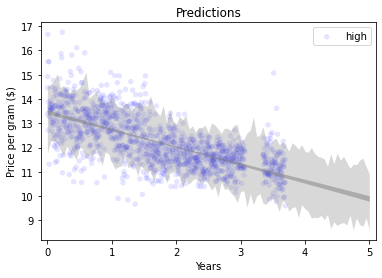

In [25]:
#Results
years = np.linspace(0, 5, 101)
thinkplot.Scatter(daily.years, daily.ppg, alpha=0.1, label=name)
PlotPredictions(daily, years)
xlim = years[0]-0.1, years[-1]+0.1
thinkplot.Config(title='Predictions',
                   xlabel='Years',
                   xlim=xlim,
                   ylabel='Price per gram ($)')

These are the results for the high quality category.

The darker region in the plot quantifies modeling uncertainty, and the lighter region quantifies predictive uncertainty.

Both the slope and the variance in the residuals seem to stay constant throughout the plot as the years get longer.

**Exercise:** Write a definition for a class named `SerialCorrelationTest` that extends `HypothesisTest` from Section 9.2. It should take a series and a lag as data, compute the serial correlation of the series with the given lag, and then compute the p-value of the observed correlation.

Use this class to test whether the serial correlation in raw price data is statistically significant. Also test the residuals of the linear model and (if you did the previous exercise), the quadratic model.

In [29]:
def SerialCorr(series, lag=1):
    xs = series[lag:]
    ys = series.shift(lag)[lag:]
    corr = thinkstats2.Corr(xs, ys)
    return corr

In [30]:
class SerialCorrelationTest(thinkstats2.HypothesisTest):
    def TestStatistic(self,data):
        series, lag = data
        #shift the time series by an interval called a lag
        #Compute the correlation of the shifted series with the original
        serial_corr = abs(SerialCorr(series,lag))
        return serial_corr
    def RunModel(self):
        series,lag = self.data
        perm = series.reindex(np.random.permutation(series.index))
        return perm, lag
        

In [31]:
#Test whether the serial correlation in raw price data is statistically significant

#High quality category
name = 'high'
daily = dailies[name]

series = daily.ppg
stat = SerialCorrelationTest((series,1))
pvalue = stat.PValue()
print(stat.actual,pvalue)

0.4852293761947379 0.0


Hypothesis test: serial correlation = 0 (not statistically significant)
Serial correlation: 0.485
P-value: 0.0

P-value < 0.05, which means we can reject the null hypothesis and conclude that the serial correlation in raw price data is statistically significant

In [33]:
# Testing the residuals of the linear model

_, results = RunLinearModel(daily)
series = results.resid
stat = SerialCorrelationTest((series, 1))
pvalue = stat.PValue()
print(stat.actual, pvalue)  

0.07570473767506261 0.005


In [34]:
# Testing the residuals for the quadratic model

_, results = RunQuadraticModel(daily)
series = results.resid
stat = SerialCorrelationTest((series, 1))
pvalue = stat.PValue()
print(stat.actual, pvalue)

0.07570473767506261 0.007


Null hypothesis: the residuals/errors are normally distributed. 

For both the linear and the quadratic model, the p-values were less than 0.05, which means we have enough reason to reject the null hypothesis and state the residuals for these models are not normally distributed. 